# Effect of Vaccines on Covid-19 fatality rate in Colombia

#### Objective:
Understand the effects that mass vaccination is having on the fatality rate of the Covid-19 virus in Colombia.
The population is segmented by age groups and a comparison is made of the fatality rate of the virus in each one of them at the start of vaccination versus at the present time..

#### Tools
- Pandas, seaborn, matplotlib, ipython-sql (SQL Magic extention)

---
#### Importing packges and SQL Server database connection

In [1]:
#importing packeges
import pyodbc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
#database connection: #mssql://Host_name/Database_name?driver=Driver_name
%load_ext sql
%sql mssql://CAMILO-PCI5\SQLEXPRESS/CovidColombia?driver=SQL+Server

In [3]:
#checking connection
conn = %sql l / --connections
print(conn)

{'mssql://CAMILO-PCI5\\SQLEXPRESS/CovidColombia?driver=SQL+Server': <sql.connection.Connection object at 0x000001EB4F307B50>}


---
#### Testing connection by retreving columns info

In [4]:
%%sql
SELECT COLUMN_NAME, DATA_TYPE from INFORMATION_SCHEMA.COLUMNS
WHERE 
 TABLE_NAME = 'Casos'

 * mssql://CAMILO-PCI5\SQLEXPRESS/CovidColombia?driver=SQL+Server
Done.


COLUMN_NAME,DATA_TYPE
fecha_reporte_web,date
id_caso,int
fecha_notificacion,date
codigo_divipola_dpto,int
nombre_dpto,varchar
codigo_divipola_municipio,int
nombre_municipio,varchar
edad,int
unidad_medida_edad,int
sexo,varchar


---
#### Retrieving the cleaned dataset

In [5]:
%%sql
SELECT TOP 5 fecha_reporte_web, id_caso, edad, unidad_medida_edad, sexo, estado, fecha_muerte
FROM Casos
ORDER BY fecha_reporte_web

 * mssql://CAMILO-PCI5\SQLEXPRESS/CovidColombia?driver=SQL+Server
Done.


fecha_reporte_web,id_caso,edad,unidad_medida_edad,sexo,estado,fecha_muerte
2020-03-06,1,19,1,F,Recuperado,None
2020-03-09,2,34,1,M,Recuperado,None
2020-03-09,3,50,1,F,Recuperado,None
2020-03-11,4,55,1,M,Recuperado,None
2020-03-11,5,25,1,M,Recuperado,None


---
#### **Total Cases** reported to date

In [6]:
r0 = %sql SELECT COUNT(*) FROM Casos
total_cases = r0[0][0]

 * mssql://CAMILO-PCI5\SQLEXPRESS/CovidColombia?driver=SQL+Server
Done.


In [7]:
total_pop = 50339000
prop_pop_inf = round((total_cases/total_pop)*100,2)
print('Total cases reported to date =',total_cases)
print('Proportion of the population infected =',prop_pop_inf, '%')

Total cases reported to date = 4932998
Proportion of the population infected = 9.8 %


---
#### **Total Deaths** and **Fatality Rate** reported to date

In [8]:
r1 = %sql SELECT estado, COUNT(estado) AS cantidad FROM Casos GROUP BY estado ORDER BY cantidad

 * mssql://CAMILO-PCI5\SQLEXPRESS/CovidColombia?driver=SQL+Server
Done.


In [9]:
df_r1 = r1.DataFrame()
df_r1['porcentaje'] = round((df_r1['cantidad']/total_cases)*100,2)
df_r1

,estado,cantidad,porcentaje
0,N/A,15256,0.31
1,Activo,20904,0.42
2,Fallecido,125713,2.55
3,Recuperado,4771125,96.72


<AxesSubplot:ylabel='porcentaje'>

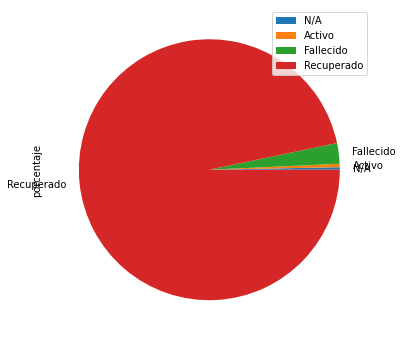

In [10]:
#ploting proportion of cases by status 
plot1 = df_r1.plot.pie(y = 'porcentaje', labels = df_r1.estado, figsize=(6,6))
plot1

In [11]:
#mortality rate: proportion of deaths per unit of population (100,000 generally used)
#fatality rate: proportion of deaths compared to the total number of people diagnosed.

r2 = %sql SELECT COUNT(estado) FROM Casos WHERE estado = 'Fallecido'

total_deaths = r2[0][0]
gen_mortality = (total_deaths*100000/total_pop)
gen_fatality = (total_deaths/total_cases)*100

print('Total deaths =', total_deaths)
print('General Mortality rate =', round(gen_mortality,2), 'per 100,000 inhabitants')
print('General Fatality rate =', round(gen_fatality,2), '%')

 * mssql://CAMILO-PCI5\SQLEXPRESS/CovidColombia?driver=SQL+Server
Done.
Total deaths = 125713
General Mortality rate = 249.73 per 100,000 inhabitants
General Fatality rate = 2.55 %


---
#### Total Cases and Deaths by **Gender**

In [12]:
%sql SELECT sexo, COUNT(*) AS 'no. de casos' FROM Casos GROUP BY sexo

 * mssql://CAMILO-PCI5\SQLEXPRESS/CovidColombia?driver=SQL+Server
Done.


sexo,no. de casos
F,2589365
M,2343633


In [13]:
%sql SELECT sexo, COUNT(*) AS 'no. de fallecidos' FROM Casos GROUP BY sexo, estado HAVING estado = 'Fallecido'

 * mssql://CAMILO-PCI5\SQLEXPRESS/CovidColombia?driver=SQL+Server
Done.


sexo,no. de fallecidos
F,48918
M,76795


In [14]:
rf = %sql SELECT COUNT(*) FROM Casos WHERE sexo = 'F'
rm = %sql SELECT COUNT(*) FROM Casos WHERE sexo = 'M'
rf_d = %sql SELECT COUNT(*) FROM Casos WHERE sexo = 'F' AND estado = 'Fallecido'
rm_d = %sql SELECT COUNT(*) FROM Casos WHERE sexo = 'M' AND estado = 'Fallecido'

 * mssql://CAMILO-PCI5\SQLEXPRESS/CovidColombia?driver=SQL+Server
Done.
 * mssql://CAMILO-PCI5\SQLEXPRESS/CovidColombia?driver=SQL+Server
Done.
 * mssql://CAMILO-PCI5\SQLEXPRESS/CovidColombia?driver=SQL+Server
Done.
 * mssql://CAMILO-PCI5\SQLEXPRESS/CovidColombia?driver=SQL+Server
Done.


In [15]:
print (rf[0][0], rm[0][0], rf_d[0][0], rm_d[0][0])

2589365 2343633 48918 76795


- *Calculating **Fatality Rate** of each geneder:*

In [16]:
#Creating a dataframe from previous results and calculating fatality rate ("letalidad") of each gender:
df_r2 = pd.DataFrame({
    'sexo':['F','M'],
    'casos':[rf[0][0], rm[0][0]],
    'fallecidos':[rf_d[0][0],rm_d[0][0]]
})
df_r2['%_casos'] = round((df_r2['casos']/total_cases)*100,2)
df_r2['%_fallecidos'] = round((df_r2['fallecidos']/total_deaths)*100,2)
df_r2['letalidad (%)'] = round((df_r2['fallecidos']/df_r2['casos'])*100,2)
df_r2

,sexo,casos,fallecidos,%_casos,%_fallecidos,letalidad (%)
0,F,2589365,48918,52.49,38.91,1.89
1,M,2343633,76795,47.51,61.09,3.28


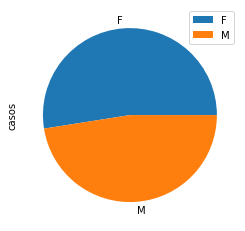

In [17]:
plot2C = df_r2.plot.pie(y='casos', figsize=(4,4), labels = df_r2.sexo)

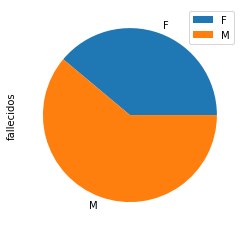

In [18]:
#ploting proportion of deaths by gender
plot2F = df_r2.plot.pie(y='fallecidos', figsize=(4,4), labels = df_r2.sexo)

---
#### Exploring **Vaccinations** Dataset
Vaccinations Data Exploratory Analysis

In [19]:
v1 = %sql SELECT COUNT(*) FROM Vaccinations
v2 = %sql SELECT COUNT(*) FROM Vaccinations WHERE location = 'Colombia'
v3 = %sql SELECT MIN([date]) FROM Vaccinations WHERE location = 'Colombia'
v4 = %sql SELECT MAX(total_vaccinations) FROM Vaccinations WHERE location = 'Colombia'
v5 = %sql SELECT MAX(people_vaccinated) FROM Vaccinations WHERE location = 'Colombia'
v6 = %sql SELECT MAX(people_fully_vaccinated) FROM Vaccinations WHERE location = 'Colombia'

 * mssql://CAMILO-PCI5\SQLEXPRESS/CovidColombia?driver=SQL+Server
Done.
 * mssql://CAMILO-PCI5\SQLEXPRESS/CovidColombia?driver=SQL+Server
Done.
 * mssql://CAMILO-PCI5\SQLEXPRESS/CovidColombia?driver=SQL+Server
Done.
 * mssql://CAMILO-PCI5\SQLEXPRESS/CovidColombia?driver=SQL+Server
Done.
 * mssql://CAMILO-PCI5\SQLEXPRESS/CovidColombia?driver=SQL+Server
Done.
 * mssql://CAMILO-PCI5\SQLEXPRESS/CovidColombia?driver=SQL+Server
Done.


In [20]:
exploration = ['Total number of rows',
               'Number of Vaccination dates in Colombia',
               'Vaccination start date',
               'Total number of doses administered',
               'People vaccinaed (at least one vaccine dose)',
               'People with the complete scheme to date']
results = [v1[0][0], v2[0][0], v3[0][0], v4[0][0], v5[0][0], v6[0][0]]

- *Exploration results:*

In [21]:
pd.Series(results, index=exploration)

Total number of rows                                 47844
Number of Vaccination dates in Colombia                208
Vaccination start date                          2021-02-17
Total number of doses administered              37444197.0
People vaccinaed (at least one vaccine dose)    24499752.0
People with the complete scheme to date         15746173.0
dtype: object

- *Setting the dataframe:*

In [22]:
%%sql rv <<
SELECT date, total_vaccinations, people_vaccinated, people_fully_vaccinated, daily_vaccinations
FROM Vaccinations
WHERE location = 'Colombia' ORDER BY date

 * mssql://CAMILO-PCI5\SQLEXPRESS/CovidColombia?driver=SQL+Server
Done.
Returning data to local variable rv


In [23]:
df_rv = rv.DataFrame()
df_rv.head()

,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations
0,2021-02-17,18.0,0.0,0.0,0.0
1,2021-02-18,9935.0,0.0,0.0,9917.0
2,2021-02-19,21307.0,0.0,0.0,10644.0
3,2021-02-20,33140.0,0.0,0.0,11041.0
4,2021-02-21,39827.0,0.0,0.0,9952.0


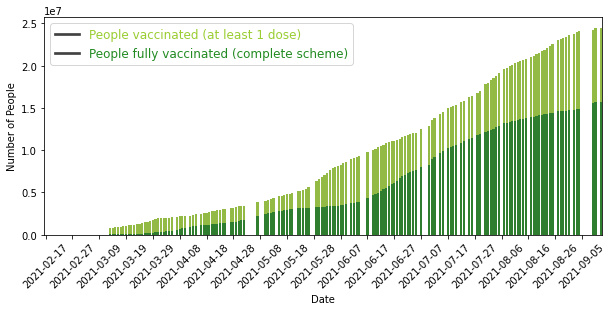

In [24]:
plt.figure(figsize=(10,4))

sns.barplot(x='date', y='people_vaccinated', data=df_rv, color = 'yellowgreen')

sns.barplot(x='date', y='people_fully_vaccinated', data=df_rv, color='forestgreen')

#plt.xticks(np.arange(0,208,1), [i if i in range(0,208,10) else '' for i in range(208)])
x = np.random.randint(low=0, high=50, size=208)
plt.xticks(np.arange(0, len(x)+1, 10))

plt.legend(fontsize='large' ,loc='upper left', labels=['People vaccinated (at least 1 dose)', 'People fully vaccinated (complete scheme)'], labelcolor=['yellowgreen','forestgreen'])
plt.ylabel('Number of People')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.show()

---
#### Categorization of Cases by **Age Group**
We need to categorize the cases by age group in order to calculate the fatality rate of each group. For this we created a view called `Casos_con_grupo_etario` from the main dataset `Casos`. It should be noted that the column `unidad_medida_edad` indicates whether the age of each patient is measured in years, months or days.

In [25]:
%%sql
--CREATE VIEW Casos_con_grupo_etario AS
SELECT TOP 5 fecha_reporte_web, id_caso, edad, unidad_medida_edad, sexo, estado, fecha_muerte,
CASE
 WHEN unidad_medida_edad = 1 THEN
   CASE
     WHEN edad <= 4 THEN '0 - 04'
     WHEN edad <= 9 THEN '05 - 09'
     WHEN edad <= 19 THEN '10 - 19'
     WHEN edad <= 29 THEN '20 - 29'
     WHEN edad <= 39 THEN '30 - 39'
     WHEN edad <= 49 THEN '40 - 49'
     WHEN edad <= 59 THEN '50 - 59'
     WHEN edad <= 69 THEN '60 - 69'
     WHEN edad <= 79 THEN '70 - 79'
     ELSE '80 o más'
   END
 ELSE '0 - 04'
END AS grupo_etario
FROM Casos
ORDER BY fecha_reporte_web;

 * mssql://CAMILO-PCI5\SQLEXPRESS/CovidColombia?driver=SQL+Server
Done.


fecha_reporte_web,id_caso,edad,unidad_medida_edad,sexo,estado,fecha_muerte,grupo_etario
2020-03-06,1,19,1,F,Recuperado,None,10 - 19
2020-03-09,2,34,1,M,Recuperado,None,30 - 39
2020-03-09,3,50,1,F,Recuperado,None,50 - 59
2020-03-11,4,55,1,M,Recuperado,None,50 - 59
2020-03-11,5,25,1,M,Recuperado,None,20 - 29


---
#### Grouping Cases and Deaths by **Age group** and **Gender**
First we group cases and deaths by Age Group and Gender in different queries. Then we **JOIN** the results of both **CTEs** tables into a single one and then create a new view from it, getting the number of **Cases and Deaths** by **Age Group** and **Gender** in the same table:

In [26]:
%%sql
--CREATE VIEW agrupacion_por_grupoetario_y_sexo AS
WITH CTE1_muertes (grupo_etario, sexo, fallecidos) AS (
        SELECT grupo_etario, sexo, COUNT(grupo_etario) AS fallecidos
        FROM Casos_con_grupo_etario
        GROUP BY grupo_etario, sexo, estado
        HAVING estado = 'Fallecido'
        ),
    CTE2_casos (grupo_etario, sexo, casos) AS (
        SELECT grupo_etario, sexo, COUNT(grupo_etario) AS casos
        FROM Casos_con_grupo_etario
        GROUP BY grupo_etario, sexo
        )
SELECT m.grupo_etario, m.sexo, fallecidos, casos
FROM CTE1_muertes m
JOIN CTE2_casos c ON m.grupo_etario = c.grupo_etario AND m.sexo = c.sexo
ORDER BY m.grupo_etario

 * mssql://CAMILO-PCI5\SQLEXPRESS/CovidColombia?driver=SQL+Server
Done.


grupo_etario,sexo,fallecidos,casos
0 - 04,M,64,40139
0 - 04,F,46,36887
05 - 09,M,21,46873
05 - 09,F,12,45569
10 - 19,F,73,192955
10 - 19,M,91,180715
20 - 29,F,603,561016
20 - 29,M,855,488316
30 - 39,F,1411,571459
30 - 39,M,2928,535368


- *Calculating **Fatality Rate** by Age Group and Gender:*

In [27]:
%%sql
SELECT *, ROUND((CONVERT(FLOAT, fallecidos)/CONVERT(FLOAT, casos))*100,2) AS letalidad
FROM agrupacion_por_grupoetario_y_sexo
ORDER BY grupo_etario;

 * mssql://CAMILO-PCI5\SQLEXPRESS/CovidColombia?driver=SQL+Server
Done.


grupo_etario,sexo,fallecidos,casos,letalidad
0 - 04,M,64,40139,0.16
0 - 04,F,46,36887,0.12
05 - 09,M,21,46873,0.04
05 - 09,F,12,45569,0.03
10 - 19,F,73,192955,0.04
10 - 19,M,91,180715,0.05
20 - 29,F,603,561016,0.11
20 - 29,M,855,488316,0.18
30 - 39,F,1411,571459,0.25
30 - 39,M,2928,535368,0.55


- *What is the segment of the population (age group and gender) with the **highest fatality rate**?*

In [28]:
%%sql
WITH CTE1_letalidad (grupo_etario, sexo, fallecidos, casos, letalidad) AS (
    SELECT *, ROUND((CONVERT(FLOAT, fallecidos)/CONVERT(FLOAT, casos))*100,2) AS letalidad
    FROM agrupacion_por_grupoetario_y_sexo
    )
SELECT * 
FROM CTE1_letalidad
WHERE letalidad = (SELECT MAX(letalidad) FROM CTE1_letalidad)

 * mssql://CAMILO-PCI5\SQLEXPRESS/CovidColombia?driver=SQL+Server
Done.


grupo_etario,sexo,fallecidos,casos,letalidad
80 o más,M,16888,50983,33.12


---
#### Fatality Rate by **Age Group**
- *Calculating **Fatality Rate** just by Age Group:*

In [29]:
%%sql
--CREATE VIEW letalidad_por_grupoetario AS
SELECT grupo_etario, SUM(fallecidos) AS fallecidos, SUM(casos) AS casos, ROUND((CONVERT(FLOAT, SUM(fallecidos))/CONVERT(FLOAT,SUM(casos)))*100,2) AS letalidad
FROM agrupacion_por_grupoetario_y_sexo
GROUP BY grupo_etario;

 * mssql://CAMILO-PCI5\SQLEXPRESS/CovidColombia?driver=SQL+Server
Done.


grupo_etario,fallecidos,casos,letalidad
0 - 04,110,77026,0.14
05 - 09,33,92442,0.04
10 - 19,164,373670,0.04
20 - 29,1458,1049332,0.14
30 - 39,4339,1106827,0.39
40 - 49,9689,836798,1.16
50 - 59,19227,679712,2.83
60 - 69,29770,407759,7.3
70 - 79,30979,198560,15.6
80 o más,29944,110872,27.01


In [30]:
#Cheking view and creating the dataframe:
r3 = %sql SELECT * FROM letalidad_por_grupoetario ORDER BY grupo_etario
df_r3 = r3.DataFrame()
df_r3

 * mssql://CAMILO-PCI5\SQLEXPRESS/CovidColombia?driver=SQL+Server
Done.


,grupo_etario,fallecidos,casos,letalidad
0,0 - 04,110,77026,0.14
1,05 - 09,33,92442,0.04
2,10 - 19,164,373670,0.04
3,20 - 29,1458,1049332,0.14
4,30 - 39,4339,1106827,0.39
5,40 - 49,9689,836798,1.16
6,50 - 59,19227,679712,2.83
7,60 - 69,29770,407759,7.30
8,70 - 79,30979,198560,15.60
9,80 o más,29944,110872,27.01


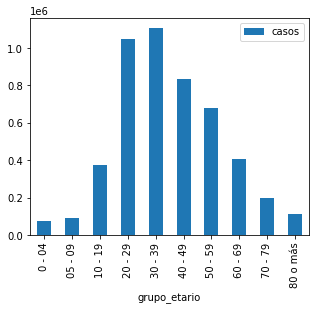

In [31]:
#cases by age group
plot3 = df_r3.plot.bar(x='grupo_etario', y='casos', figsize=(5,4))

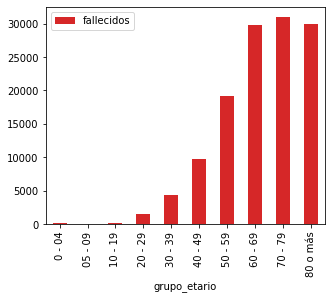

In [32]:
#deaths by age group
plot3_1 = df_r3.plot.bar(x='grupo_etario', y='fallecidos', figsize=(5,4), color = 'tab:red')

- *What is the age group with the **highest fatality rate**?*

In [33]:
%sql SELECT * FROM letalidad_por_grupoetario WHERE letalidad = (SELECT MAX(letalidad) FROM letalidad_por_grupoetario)

 * mssql://CAMILO-PCI5\SQLEXPRESS/CovidColombia?driver=SQL+Server
Done.


grupo_etario,fallecidos,casos,letalidad
80 o más,29944,110872,27.01


- *What is the age group with the **lowest fatality rate**?*

In [34]:
%sql SELECT * FROM letalidad_por_grupoetario WHERE letalidad = (SELECT MIN(letalidad) FROM letalidad_por_grupoetario);

 * mssql://CAMILO-PCI5\SQLEXPRESS/CovidColombia?driver=SQL+Server
Done.


grupo_etario,fallecidos,casos,letalidad
05 - 09,33,92442,0.04
10 - 19,164,373670,0.04


> **Remarks:**
>- *Within each age group, the gender with the highest latility rate is the Male, having a greater risk of death if they contract the disease.*
>- *The age groups with the highest latality rate are the more advance ones: `60 - 69`, `70 - 79` and `80 o más` with 7.3%, 15.6% and 27.1% respectively.*
>- *The fatality rate of these groups is quite high compared with the general rate that is 2.55%.*
>- *It is shown that we cannot use the general fatality rate as a comparable measure for all age groups.*

---
#### Effect of vaccines on Fatality Rate
Next, we will study how the fatality rate of each age group has evolved from month to month since the start of the pandemic. We will focus primarily on comparing the behavior of this measure before and after the start of vaccination in February 2021. We will see if there is any positive effect by reducing mortality for each age group.

- *Grouping Cases and Deaths by **Month** and **Age group**:*

In [35]:
%%sql
--CREATE VIEW agrupacion_por_mes_y_grupoetario AS
WITH CTE3_casos (año, mes, grupo_etario, casos) AS (
      SELECT YEAR(fecha_reporte_web) AS año, MONTH(fecha_reporte_web) AS mes, grupo_etario, COUNT(fecha_reporte_web) AS casos
      FROM Casos_con_grupo_etario
      GROUP BY YEAR(fecha_reporte_web), MONTH(fecha_reporte_web), grupo_etario
      ),
    CTE4_muertes (año, mes, grupo_etario, fallecidos) AS (
      SELECT YEAR(fecha_muerte) AS año, MONTH(fecha_muerte) AS mes, grupo_etario, COUNT(fecha_muerte) AS fallecidos
      FROM Casos_con_grupo_etario
      GROUP BY YEAR(fecha_muerte), MONTH(fecha_muerte), grupo_etario, estado
      HAVING estado = 'Fallecido'
      )
SELECT TOP 5 c.año, c.mes, c.grupo_etario, fallecidos, casos
FROM CTE3_casos c
LEFT JOIN CTE4_muertes m ON c.año = m.año AND c.mes = m.mes AND c.grupo_etario = m.grupo_etario

 * mssql://CAMILO-PCI5\SQLEXPRESS/CovidColombia?driver=SQL+Server
Done.


año,mes,grupo_etario,fallecidos,casos
2021,5,50 - 59,2864,84982
2020,6,80 o más,770,1871
2021,6,40 - 49,2085,151771
2020,10,70 - 79,1479,10468
2021,7,70 - 79,2733,19014


- *Calculating general Fatality Rate by **Month**:*

In [36]:
%%sql r4 <<
SELECT CONCAT(año,'-', mes) AS año_mes, SUM(fallecidos) AS fallecidos, SUM(casos) AS casos, ROUND((CONVERT(FLOAT, SUM(fallecidos))/CONVERT(FLOAT,SUM(casos)))*100,2) AS letalidad
FROM agrupacion_por_mes_y_grupoetario
GROUP BY año, mes
ORDER BY año, mes

 * mssql://CAMILO-PCI5\SQLEXPRESS/CovidColombia?driver=SQL+Server
Done.
Returning data to local variable r4


In [37]:
df_r4 = r4.DataFrame()
df_r4

,año_mes,fallecidos,casos,letalidad
0,2020-3,32,905,3.54
1,2020-4,331,5560,5.95
2,2020-5,873,22917,3.81
3,2020-6,3119,68471,4.56
4,2020-7,7685,197663,3.89
5,2020-8,8971,319661,2.81
6,2020-9,5746,214510,2.68
7,2020-10,5344,244502,2.19
8,2020-11,5414,242662,2.23
9,2020-12,6793,325951,2.08


<function matplotlib.pyplot.show(close=None, block=None)>

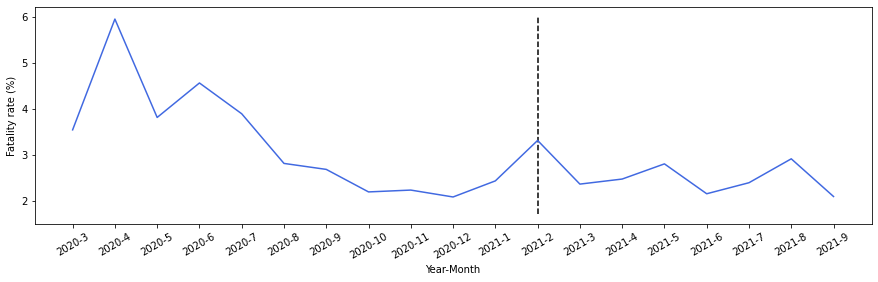

In [38]:
plt.figure(figsize=(15,4))
plot = sns.lineplot(x='año_mes', y='letalidad', data = df_r4, color='royalblue')
plt.xticks(rotation=30)
plt.vlines(11, 1.7,6, linestyles="dashed", colors="black")
plt.ylabel('Fatality rate (%)')
plt.xlabel('Year-Month')
plt.show

- *Calculating Fatality Rate by **Month** and **Age Group**:*

In [39]:
%%sql r5 <<
--CREATE VIEW letalidad_por_grupoetario_por_mes AS
SELECT año, mes, CONCAT(año,'-', mes) AS año_mes, grupo_etario, fallecidos, casos, ROUND((CONVERT(FLOAT, fallecidos)/CONVERT(FLOAT,casos))*100,2) AS letalidad
FROM agrupacion_por_mes_y_grupoetario
ORDER BY año, mes, grupo_etario

 * mssql://CAMILO-PCI5\SQLEXPRESS/CovidColombia?driver=SQL+Server
Done.
Returning data to local variable r5


In [40]:
#Creating the dataframe:
df_5 = r5.DataFrame()
df_5.iloc[:,2:]

,año_mes,grupo_etario,fallecidos,casos,letalidad
0,2020-3,0 - 04,1.0,7,14.29
1,2020-3,05 - 09,NaN,7,NaN
2,2020-3,10 - 19,1.0,31,3.23
3,2020-3,20 - 29,2.0,195,1.03
4,2020-3,30 - 39,4.0,208,1.92
...,...,...,...,...,...
185,2021-9,40 - 49,32.0,3632,0.88
186,2021-9,50 - 59,57.0,2576,2.21
187,2021-9,60 - 69,95.0,1713,5.55
188,2021-9,70 - 79,131.0,1075,12.19


- *Ploting Fatality Rate by **Month** and **Age Group**:*

<function matplotlib.pyplot.show(close=None, block=None)>

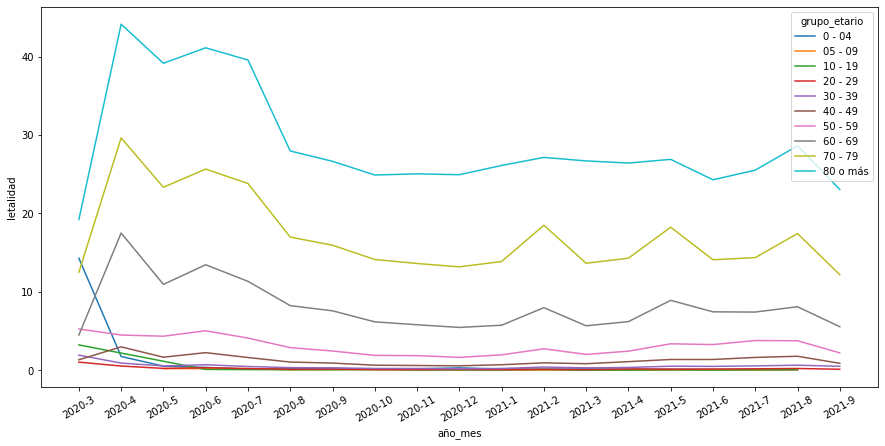

In [41]:
plt.figure(figsize=(15,7))
plot = sns.lineplot(x='año_mes', y='letalidad', hue='grupo_etario', data=df_5)
plt.xticks(rotation=30)
plt.show

>**Remarks:**
> - *During the first five months the general fatality rate remains is very high. It begins to stabilize at values between 2% and 3% from month 08-2020.*
> - *If we analyze from 08-2020 to 09-2021, it it hard to say that there is a significant difference before and after the start vaccination at leats at this level of granularity.*
> - *A downward trend in fatality is observed reaching 2.03% in 09-2021 which is the lowest value in the entire pandemic.*
> - *We must take a closer look at the data and analyze the behavior of the fatality rate week by week*

---
#### Effect of vaccines on Fatality Rate - Weekly Detail
Due to the lack of details we got from month to month, we are going to study how the fatality rate has evolved from **week to week**. Againg, we will focus primarily on comparing fatality rate  before and after the start of vaccination (Feb 2021), but also how is the **behaviour of this measure related with the number of vaccines dosed every week**. We will see if there is any positive effect by reducing fatality rate for each age group.

In [42]:
%%sql r6 <<
WITH CTE5_casos (año, semana, casos) AS (
      SELECT YEAR(fecha_reporte_web) AS año, DATEPART(WEEK,fecha_reporte_web), COUNT(fecha_reporte_web) AS casos
      FROM Casos_con_grupo_etario
      GROUP BY YEAR(fecha_reporte_web), DATEPART(WEEK,fecha_reporte_web)
      ),
    CTE6_muertes (año, semana, fallecidos) AS (
      SELECT YEAR(fecha_muerte) AS año, DATEPART(WEEK,fecha_reporte_web), COUNT(fecha_muerte) AS fallecidos
      FROM Casos_con_grupo_etario
      GROUP BY YEAR(fecha_muerte), DATEPART(WEEK,fecha_reporte_web), estado
      HAVING estado = 'Fallecido'
      )
SELECT c.año, c.semana, fallecidos, casos
FROM CTE5_casos c
LEFT JOIN CTE6_muertes m ON c.año = m.año AND c.semana = m.semana
ORDER BY año, semana

 * mssql://CAMILO-PCI5\SQLEXPRESS/CovidColombia?driver=SQL+Server
Done.
Returning data to local variable r6


In [43]:
df_r6 = r6.DataFrame()
df_r6['letalidad'] = round((df_r6.fallecidos/df_r6.casos)*100,2)
df_r6['año-semana'] = df_r6.año.astype(str)+'-'+df_r6.semana.astype(str)
df_r6

,año,semana,fallecidos,casos,letalidad,año-semana
0,2020,10,5,1,500.00,2020-10
1,2020,11,7,36,19.44,2020-11
2,2020,12,11,175,6.29,2020-12
3,2020,13,25,396,6.31,2020-13
4,2020,14,56,798,7.02,2020-14
...,...,...,...,...,...,...
77,2021,34,404,22268,1.81,2021-34
78,2021,35,308,16407,1.88,2021-35
79,2021,36,182,13676,1.33,2021-36
80,2021,37,147,11598,1.27,2021-37


- *Average change in the last two months:* 

In [44]:
round(100-(df_r6.letalidad[78:].mean()/df_r6.letalidad[74:78].mean())*100,2)

28.06

- *Ploting Fatality Rate and Deaths by **Week**:*  
We plot from week 3 due to the few records per week that were obtained during the first two weeks.

<function matplotlib.pyplot.show(close=None, block=None)>

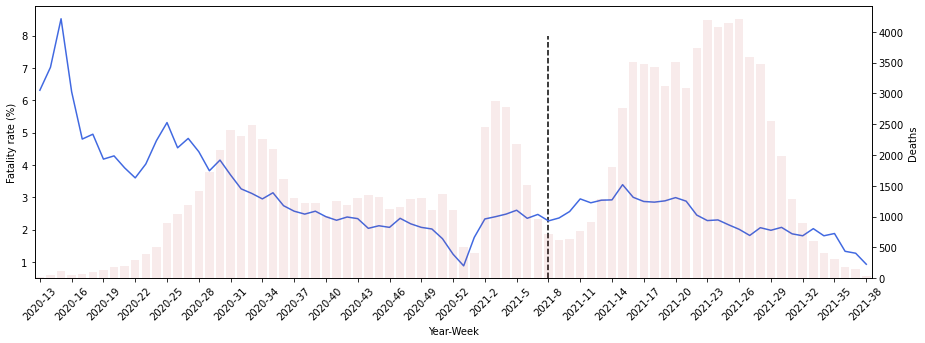

In [45]:
plt.figure(figsize=(15,5))

plt.ylabel('Fatality rate (%)')
plt.xlabel('Year-Week')
plt.xticks(rotation=45)
plt.vlines(48, 0,8, linestyles="dashed", colors="black")

sns.lineplot(x=df_r6['año-semana'][3:], y='letalidad', data=df_r6[3:], ci = None, color = 'royalblue')
ax2 = plt.twinx()
sns.barplot(x=df_r6['año-semana'][3:], y='fallecidos', data=df_r6[3:], color = 'tab:red', ci = None, alpha=0.1, ax=ax2,)

plt.ylabel('Deaths')
#plt.xticks(np.arange(0,80,1), [i if i in range(0,80,2) else '' for i in range(80)])
x = np.random.randint(low=0, high=50, size=80)
plt.xticks(np.arange(0, len(x)+1, 3))
plt.show

- *Grouping by **Age Group** and **Week**:* 

In [46]:
%%sql r7 <<
WITH CTE5_casos (año, semana, grupo_etario, casos) AS (
      SELECT YEAR(fecha_reporte_web) AS año, DATEPART(WEEK,fecha_reporte_web) AS semana, grupo_etario, COUNT(fecha_reporte_web) AS casos
      FROM Casos_con_grupo_etario
      GROUP BY YEAR(fecha_reporte_web), DATEPART(WEEK,fecha_reporte_web), grupo_etario
      ),
    CTE6_muertes (año, semana, grupo_etario, fallecidos) AS (
      SELECT YEAR(fecha_muerte) AS año, DATEPART(WEEK,fecha_reporte_web) AS semana, grupo_etario, COUNT(fecha_muerte) AS fallecidos
      FROM Casos_con_grupo_etario
      GROUP BY YEAR(fecha_muerte), DATEPART(WEEK,fecha_reporte_web), grupo_etario, estado
      HAVING estado = 'Fallecido'
      )
SELECT c.año, c.semana, c.grupo_etario, fallecidos, casos
FROM CTE5_casos c
LEFT JOIN CTE6_muertes m ON c.año = m.año AND c.semana = m.semana AND c.grupo_etario = m.grupo_etario
ORDER BY año, semana, grupo_etario

 * mssql://CAMILO-PCI5\SQLEXPRESS/CovidColombia?driver=SQL+Server
Done.
Returning data to local variable r7


In [47]:
df_r7 = r7.DataFrame()
df_r7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 808 entries, 0 to 807
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   año           808 non-null    int64  
 1   semana        808 non-null    int64  
 2   grupo_etario  808 non-null    object 
 3   fallecidos    691 non-null    float64
 4   casos         808 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 31.7+ KB


In [48]:
df_r7['año-semana'] = df_r7.año.astype(str)+'-'+df_r7.semana.astype(str)
df_r7['letalidad'] = round((df_r7.fallecidos/df_r7.casos)*100,2)

In [49]:
order_ge = ['0 - 04', '05 - 09', '10 - 19', '20 - 29', '30 - 39',
            '40 - 49', '50 - 59', '60 - 69', '70 - 79', '80 o más']

In [50]:
df_r7.head()

,año,semana,grupo_etario,fallecidos,casos,año-semana,letalidad
0,2020,10,10 - 19,NaN,1,2020-10,NaN
1,2020,11,10 - 19,NaN,1,2020-11,NaN
2,2020,11,20 - 29,1.0,11,2020-11,9.09
3,2020,11,30 - 39,NaN,4,2020-11,NaN
4,2020,11,40 - 49,1.0,4,2020-11,25.00


In [51]:
df_r77 = df_r7.loc[~df_r7['año-semana'].isin(['2020-10','2020-11','2020-12']) ,:]
df_r77.head()

,año,semana,grupo_etario,fallecidos,casos,año-semana,letalidad
18,2020,13,0 - 04,NaN,1,2020-13,NaN
19,2020,13,05 - 09,NaN,2,2020-13,NaN
20,2020,13,10 - 19,NaN,12,2020-13,NaN
21,2020,13,20 - 29,1.0,75,2020-13,1.33
22,2020,13,30 - 39,NaN,101,2020-13,NaN


- *Ploting Fatality Rate and Deaths by **Age Group** and **Week**:* 

<function matplotlib.pyplot.show(close=None, block=None)>

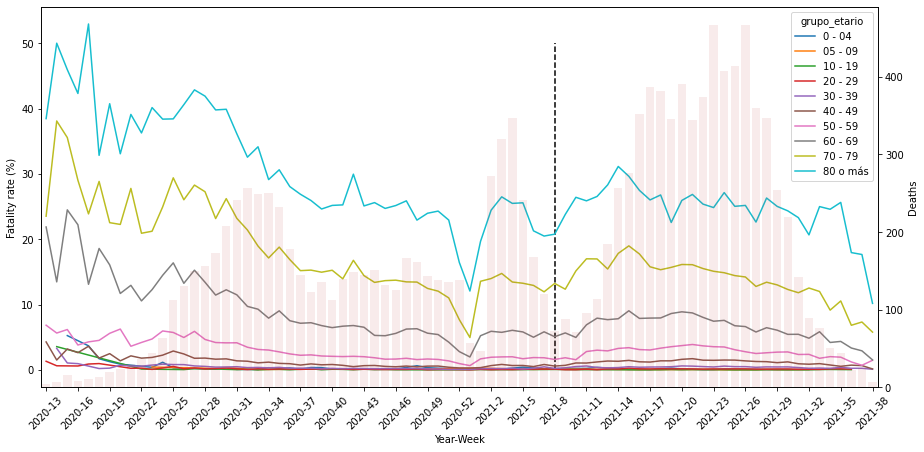

In [52]:
plt.figure(figsize=(15,7))

plt.ylabel('Fatality rate (%)')
plt.xlabel('Year-Week')
plt.xticks(rotation=45)
plt.vlines(48, 0,50, linestyles="dashed", colors="black")

sns.lineplot(data = df_r77, x ='año-semana', y = 'letalidad', hue='grupo_etario', hue_order = order_ge, ci = None)
ax2 = plt.twinx()
sns.barplot(data = df_r77, x = 'año-semana', y = 'fallecidos', color = 'tab:red', alpha=0.1, ax=ax2, ci = None)

plt.ylabel('Deaths')
#plt.xticks(np.arange(0,80,1), [i if i in range(0,80,2) else '' for i in range(80)])
x = np.random.randint(low=0, high=50, size=80)
plt.xticks(np.arange(0, len(x)+1, 3))
plt.show

- *Filtering by **Age Group**:* 

<function matplotlib.pyplot.show(close=None, block=None)>

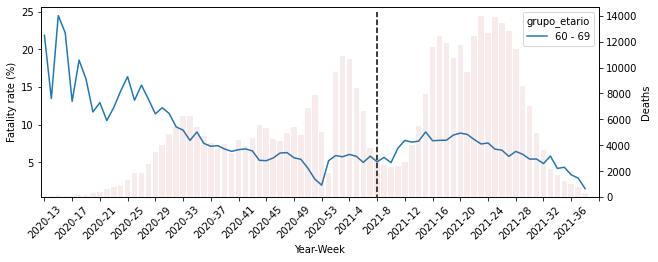

In [53]:
plt.figure(figsize=(10,3.5))

plt.ylabel('Fatality rate (%)')
plt.xlabel('Year-Week')
plt.xticks(rotation=45)
plt.vlines(48, 0,25, linestyles="dashed", colors="black")

sns.lineplot(data = df_r77.loc[df_r77.grupo_etario == '60 - 69',:], x ='año-semana', y = 'letalidad', color='sienna', hue='grupo_etario', ci = None)
ax2 = plt.twinx()
sns.barplot(data = df_r77.loc[df_r77.grupo_etario == '60 - 69',:], x = 'año-semana', y = 'casos', color = 'tab:red', alpha=0.1, ax=ax2, ci = None)

plt.ylabel('Deaths')
#plt.xticks(np.arange(0,80,1), [i if i in range(0,80,2) else '' for i in range(80)])
x = np.random.randint(low=0, high=50, size=80)
plt.xticks(np.arange(0, len(x)+1, 4))
plt.show

- *Calculating average change in fatality rate for one age group:*

In [54]:
df_r78 = df_r77.loc[df_r77.grupo_etario == '60 - 69',:].reset_index(drop=True)

In [55]:
df_r78['año-semana'][48:64]

48     2021-8
49     2021-9
50    2021-10
51    2021-11
52    2021-12
53    2021-13
54    2021-14
55    2021-15
56    2021-16
57    2021-17
58    2021-18
59    2021-19
60    2021-20
61    2021-21
62    2021-22
63    2021-23
Name: año-semana, dtype: object

In [56]:
round(100-(df_r78.letalidad[64:].mean()/df_r78.letalidad[48:64].mean())*100,2)

31.63

- *Comparing fatality rate of all age groups with a relplot:**

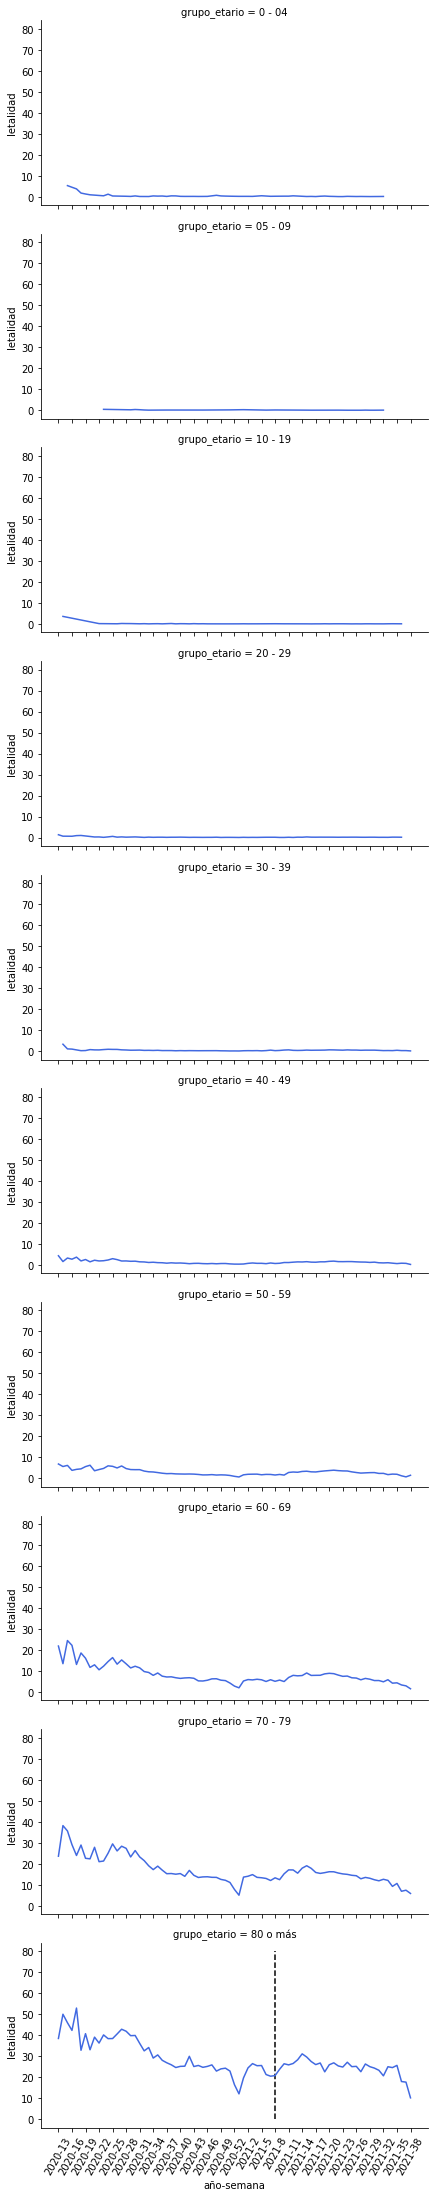

In [57]:
#plt.figure(figsize=(20,5))
sns.relplot(data = df_r77, x='año-semana', y='letalidad',
               height = 3,
               aspect = 2,
               row='grupo_etario',
               row_order = order_ge,
               kind='line',
               color = 'royalblue',
               ci=None)
plt.xticks(rotation=60)
plt.vlines(48, 0,80, linestyles="dashed", colors="black")
x = np.random.randint(low=0, high=50, size=80)
plt.xticks(np.arange(0, len(x)+1, 3))
plt.show()

>**Remarks:**
>- *According to the graphs, a general downward trend in fatality is observed.*
>- *However, during the first three months after the start of vaccination, there does not seem to be a significant change that indicates a decrease in fatality rate. During this time, there are notable peaks and valleys in its behavior given the sudden increase and decrease in the number of infections during those months.*
>- *A slight decrease in the fatality rate starts to be noticeable only four months after the start of vaccination (from week 2021-23). From there, a downward trend in fatality is observed reaching 2.03% in 09-2021 which is the lowest value in the entire pandemic.*
>- *Fatality rate tends to be higher in older age groups. This behavior is maintained throughout the pandemic, confirming that older people have been the hardest hit by the virus.
>- *The final downward trend in the fatality rate is very pronounced in the "70 -79" and "80 or more" groups.*

- *Relationship between Cases and Deaths by **Age Group**:*

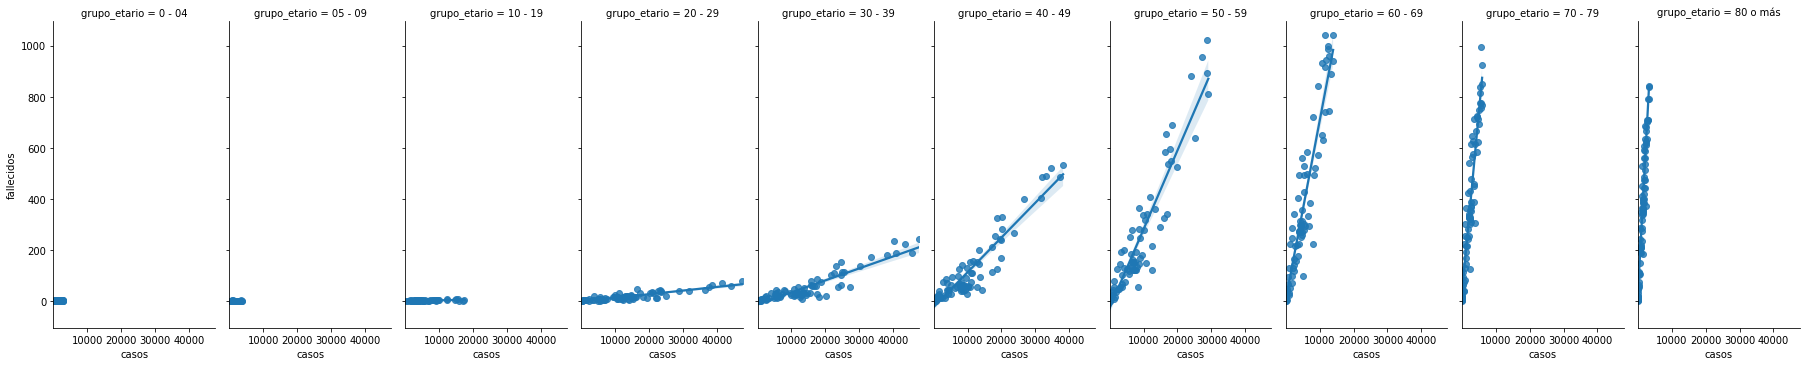

In [58]:
#plt.figure(figsize = (10,10))
sns.lmplot(data =df_r7, x='casos', y='fallecidos',  col='grupo_etario', col_order= order_ge, height = 5, aspect = 0.5)
plt.show()

- *Comparing **Cases** vs **Deaths by week**:*  
The height of the bar is relative to the y axis scale. They are not proportional to the real numbers.

<function matplotlib.pyplot.show(close=None, block=None)>

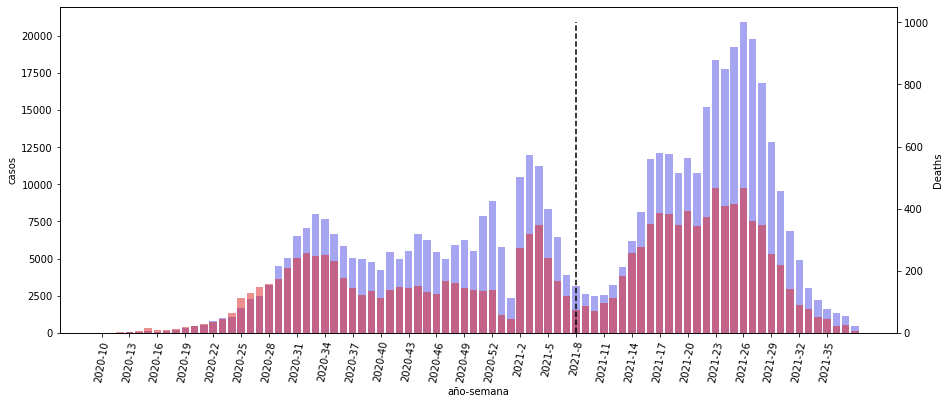

In [59]:
plt.figure(figsize=(15,6))
plt.ylabel('Cases')
plt.xlabel('Year-Week')
plt.xticks(rotation=80)

sns.barplot(x='año-semana', y='casos', data = df_r7, color = 'b', alpha=0.4, ci=None)
ax2 = plt.twinx()
sns.barplot(x='año-semana', y='fallecidos', data=df_r7, ax=ax2, ci = None, color='r', alpha=0.5)

plt.ylabel('Deaths')
x = np.random.randint(low=0, high=50, size=80)
plt.xticks(np.arange(0, len(x)+1, 3))
plt.vlines(51, 0,1000, linestyles="dashed", colors="black")

plt.show

---
#### Vaccinations vs Fatality Rate

- *Grouping vaccinations **by week**:*

In [60]:
%%sql r8 <<
SELECT YEAR(date) AS año, DATEPART(WEEK, date) AS semana, SUM(daily_vaccinations) AS vaccinations
FROM Vaccinations
WHERE location = 'Colombia'
GROUP BY YEAR(date), DATEPART(WEEK, date)

 * mssql://CAMILO-PCI5\SQLEXPRESS/CovidColombia?driver=SQL+Server
Done.
Returning data to local variable r8


In [61]:
df_r8 = r8.DataFrame()
df_r8.head()

,año,semana,vaccinations
0,2021,8,31602.0
1,2021,9,62383.0
2,2021,10,130334.0
3,2021,11,315182.0
4,2021,12,512062.0


In [62]:
df_r9 = df_r6.loc[(df_r6.año == 2021) & (df_r6.semana >=8) ,:].reset_index(drop=True)
df_r9.head()

,año,semana,fallecidos,casos,letalidad,año-semana
0,2021,8,724,31907,2.27,2021-8
1,2021,9,617,26113,2.36,2021-9
2,2021,10,644,25110,2.56,2021-10
3,2021,11,761,25837,2.95,2021-11
4,2021,12,909,32104,2.83,2021-12


- *Joining Vaccinations by week with Fatality rate by week:*

In [63]:
df_r8_9 = df_r9.merge(df_r8, how = 'left', on = 'año' and 'semana').drop('año_y', axis = 1).rename({'año_x' : 'año'}, axis = 1)
df_r8_9.tail()

,año,semana,fallecidos,casos,letalidad,año-semana,vaccinations
26,2021,34,404,22268,1.81,2021-34,1400427.0
27,2021,35,308,16407,1.88,2021-35,1737702.0
28,2021,36,182,13676,1.33,2021-36,1440250.0
29,2021,37,147,11598,1.27,2021-37,1216630.0
30,2021,38,41,4420,0.93,2021-38,149843.0


- *Scatterplot: Vaccinations vs Fatality Rate (week by week):*

<Figure size 720x720 with 0 Axes>

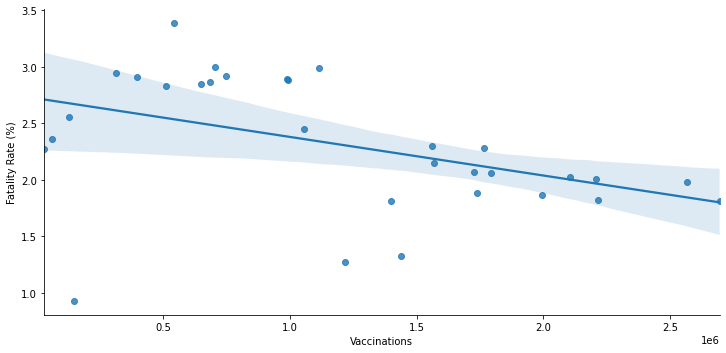

In [64]:
plt.figure(figsize = (10,10))
sns.lmplot(data = df_r8_9, x='vaccinations', y='letalidad',  height = 5, aspect = 2)

plt.ylabel('Fatality Rate (%)')
plt.xlabel('Vaccinations')
plt.show()

- *Comparig Fatality Rate and Vaccinations through time (by week):*

<function matplotlib.pyplot.show(close=None, block=None)>

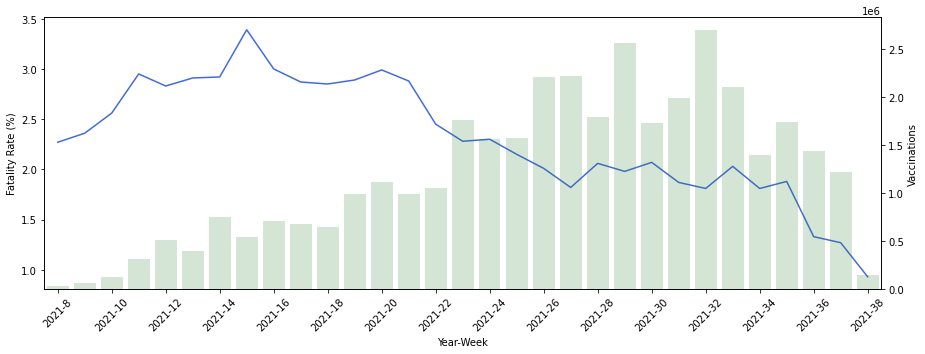

In [65]:
plt.figure(figsize=(15,5))
plt.ylabel('Fatality Rate (%)')
plt.xlabel('Year-Week')
plt.xticks(rotation=45)

sns.lineplot(x='año-semana', y='letalidad', data = df_r8_9, color = 'royalblue', ci=None)
ax2 = plt.twinx()
sns.barplot(x='año-semana', y='vaccinations', data=df_r8_9, ax=ax2, ci = None, color='forestgreen', alpha=0.2)

plt.ylabel('Vaccinations')
x = np.random.randint(low=0, high=50, size=30)
plt.xticks(np.arange(0, len(x)+1, 2))

plt.show

- *Calculating correlation coefficient:*

In [66]:
df_r8_9[['fallecidos', 'casos','letalidad', 'vaccinations']].corr()

,fallecidos,casos,letalidad,vaccinations
fallecidos,1.000000,0.955338,0.401504,0.248688
casos,0.955338,1.000000,0.178002,0.428150
letalidad,0.401504,0.178002,1.000000,-0.444976
vaccinations,0.248688,0.428150,-0.444976,1.000000


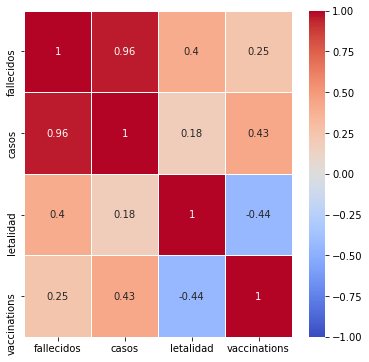

In [67]:
df_r8_9[['fallecidos', 'casos','letalidad', 'vaccinations']].corr()
plt.figure(figsize = (6,6))
sns.heatmap(df_r8_9[['fallecidos', 'casos','letalidad', 'vaccinations']].corr(), vmin=-1, vmax=1, center=0 , annot=True, cmap="coolwarm", linewidths=1)
plt.show()

>**Remarks:**
>- *Fatality rate tends to be higher in older age groups. This behavior is maintained throughout the pandemic. Therefore, it is correct to conclude that the older a person is, the greater risk of dying if they contract the disease.*
>- *According to the research, the people least affected by the pandemic are between 0 and 49 years old. In these age groups, fatality averages below 2%.*
>- *During the first three months after the start of vaccination, there does not seem to be a significant change that indicates a decrease in fatality rate, however, a slight decrease in the fatality rate starts to be noticeable four months after the start of vaccination (from week 2021-23). Naturally, this change is evident in the more advanced age groups since they were a priority in the country's vaccination scheme.*
>- *The age group of '60 - 69' is the one that has had the greatest reduction in the fatality rate since the beginning of vaccination: about 31% on average.*
>- *If we look the whole picture, a general downward trend in the fatality rate is observed. It can be caused by multiple reasons: from a better effectiveness in hospital treatments to the immunity obtained by the vaccine. The data presented here show us that even though it is slight, the correlation exists: as the number of doses applied increases, the overall fatality rate decreases.*
>- *It is true that there is a long way to go in the vaccination scheme, but the results of the advances may already begin to be noticed. In the coming months, vaccines will be able to be tested upon the arrival of a fourth wave of infections.*